In [1]:
#Importing basic packages required during the Data Preparation and Visualisations
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
#print(plt.__version__)
import json
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

## 1st Dataset (Recipes) exploration and preparation

In [31]:
#Importing the recipes dataset and getting basic idea of its shape and contents 
food_data = pd.read_json("recipes_raw_nosource_ar.json", orient="index")
print(food_data.shape)
print(food_data.head(5))

(39522, 4)
                                                                       ingredients  \
../AFIrLizRK7C5isREQ0hUdXoNXTpS  [2 1/2 cups creamy salad dressing (such as Mir...   
..3M3xsVPQLnncQ2oYzCyhGjNe/6EB2  [1 3/4 cups white sugar ADVERTISEMENT, 8 cups ...   
..64QbeV22IrPuRAdLu4zscfAjsaFaK  [2 cups baking mix ADVERTISEMENT, 1/2 cup shre...   
..6gl/0GIzSugrbvy6kHyxEHMMP4h9K  [2 teaspoons olive oil ADVERTISEMENT, 1 cup ch...   
..B3IS4KrEGWH7o13lvV9nQSe9a4u36  [1/2 cup uncooked long-grain rice ADVERTISEMEN...   

                                                                      instructions  \
../AFIrLizRK7C5isREQ0hUdXoNXTpS  Mix creamy salad dressing, mustard, sugar, and...   
..3M3xsVPQLnncQ2oYzCyhGjNe/6EB2  In a small saucepan, combine sugar and 1 cup w...   
..64QbeV22IrPuRAdLu4zscfAjsaFaK  Preheat an oven to 450 degrees F (230 degrees ...   
..6gl/0GIzSugrbvy6kHyxEHMMP4h9K  In a large saucepan, heat oil over medium heat...   
..B3IS4KrEGWH7o13lvV9nQSe9a4u36  Preheat o

In [3]:
#Imprting recipes dataset as a JSON dictionary to explore its values
food_index = list(range(0, 39522))
food = open("recipes_raw_nosource_ar.json")
food_dict = json.load(food)
len(food_dict.values())

39802

In [4]:
#Changing the index of JSON Dictionary of Food Recipes to integers from orignal values
# Orignal index were URLs from whcih the recipe was obtained
final_food_dict = dict(zip(food_index, list(food_dict.values())))
    
#Converting dictionary into DataFrame and adding Index column for use as pivot later
food_ing_data = pd.DataFrame(final_food_dict)
food_ing_data = food_ing_data.transpose()
food_ing_data.insert(loc = 0, column = "Index", value = food_index)
food_ing_data

,Index,title,ingredients,instructions,picture_link
0,0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
1,1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
2,2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
3,3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
4,4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm
...,...,...,...,...,...
39517,39517,"Vegan Tomato, Cucumber, and Lentil Salad","[8 cups water ADVERTISEMENT, 1 pound dried len...",Combine water and lentils in a large pot. Brin...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa
39518,39518,Buff-a-Enchiladas,[8 flour tortillas (6 to 8 inch) ADVERTISEMENT...,Preheat oven to 400 degrees F.\nMicrowave tort...,YiEUTIZEE4rjtd.tG6iUHdN54DqH4H2
39519,39519,Salami Provolone Burger,"[1 1/2 pounds ground beef ADVERTISEMENT, 1 tea...",Preheat grill pan (or grill). Form meat into f...,RH6CC42PXtq8pG9p8jWYOF9gFeEfpu6
39520,39520,Pasta Rosa with Scallops,[8 ounces bow tie (farfalle) pasta ADVERTISEME...,Cook and drain pasta following package instruc...,2hXUeVdo6Au75z0rYUA2U9Js9FFRkYq


In [5]:
#Removing unecessary columns like instructions and pictures
food_ing_fdata = food_ing_data.drop(food_ing_data.columns[[3,4]], axis =1)
food_ing_fdata.head(10)

,Index,title,ingredients
0,0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD..."
1,1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...
2,2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2..."
3,3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w..."
4,4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...
5,5,Banana Banana Bread,"[2 cups all-purpose flour ADVERTISEMENT, 1 tea..."
6,6,Chef John's Fisherman's Pie,"[For potato crust: ADVERTISEMENT, 3 russet pot..."
7,7,Mom's Zucchini Bread,"[3 cups all-purpose flour ADVERTISEMENT, 1 tea..."
8,8,The Best Rolled Sugar Cookies,"[1 1/2 cups butter, softened ADVERTISEMENT, 2 ..."
9,9,Singapore Chili Crabs,"[Sauce: ADVERTISEMENT, 1/2 cup ketchup ADVERTI..."


In [7]:
#Breaking the ingredients into individual rows in the DataFrame
food_data_split = food_ing_fdata.ingredients.apply(pd.Series)\
.merge(food_ing_fdata, left_index=True, right_index=True)\
.drop(["ingredients"], axis=1)\
.melt(id_vars= ["Index", "title"], value_name="ingredient")\
.drop("variable", axis =1)\
.dropna()
food_data_split.head()

,Index,title,ingredient
0,0,Slow Cooker Chicken and Dumplings,"4 skinless, boneless chicken breast halves ADV..."
1,1,Awesome Slow Cooker Pot Roast,2 (10.75 ounce) cans condensed cream of mushro...
2,2,Brown Sugar Meatloaf,1/2 cup packed brown sugar ADVERTISEMENT
3,3,Best Chocolate Chip Cookies,"1 cup butter, softened ADVERTISEMENT"
4,4,Homemade Mac and Cheese Casserole,8 ounces whole wheat rotini pasta ADVERTISEMENT


In [8]:
#Remove 'ADVERTISEMENT' phrase from each entry and remove empty entries
food_data_split['ingredient']=food_data_split['ingredient'].map(lambda x: x.rstrip(' ADVERTISEMENT')).dropna(axis=0, how='any')
food_data_split = food_data_split[food_data_split["ingredient"].str.contains(":")==False]

#Add empty Columns for sugar, fat, cholestrol and alcohol to add values later
ingredients_data = pd.concat([food_data_split, pd.DataFrame(columns= ['Sugars, total (g)', 'Total Fat (g)', 'Cholesterol (mg)', 'Carotene, beta (mcg)', 'Alcohol (g)'])], sort=False)
ingredients_data

,Index,title,ingredient,"Sugars, total (g)",Total Fat (g),Cholesterol (mg),"Carotene, beta (mcg)",Alcohol (g)
0,0.0,Slow Cooker Chicken and Dumplings,"4 skinless, boneless chicken breast halves",NaN,NaN,NaN,NaN,NaN
1,1.0,Awesome Slow Cooker Pot Roast,2 (10.75 ounce) cans condensed cream of mushro...,NaN,NaN,NaN,NaN,NaN
2,2.0,Brown Sugar Meatloaf,1/2 cup packed brown sugar,NaN,NaN,NaN,NaN,NaN
3,3.0,Best Chocolate Chip Cookies,"1 cup butter, softened",NaN,NaN,NaN,NaN,NaN
4,4.0,Homemade Mac and Cheese Casserole,8 ounces whole wheat rotini pasta,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1337496,33270.0,Street Taco with Mango Salsa,"10 tablespoons crumbled feta cheese, or to taste",NaN,NaN,NaN,NaN,NaN
1340626,36400.0,"Gabe's Coffee-Crusted Hanger Steak with Apple,...",,NaN,NaN,NaN,NaN,NaN
1374267,30519.0,Pulled Pork Pesto Sandwich,,NaN,NaN,NaN,NaN,NaN
1377018,33270.0,Street Taco with Mango Salsa,"10 tablespoons plain yogurt, or to taste",NaN,NaN,NaN,NaN,NaN


In [10]:
#Remove empty rows containing no ingredients
ingredients_data_ = ingredients_data.drop(ingredients_data[ingredients_data["ingredient"]==""].index)
ingredients_data_

,Index,title,ingredient,"Sugars, total (g)",Total Fat (g),Cholesterol (mg),"Carotene, beta (mcg)",Alcohol (g)
0,0.0,Slow Cooker Chicken and Dumplings,"4 skinless, boneless chicken breast halves",NaN,NaN,NaN,NaN,NaN
1,1.0,Awesome Slow Cooker Pot Roast,2 (10.75 ounce) cans condensed cream of mushro...,NaN,NaN,NaN,NaN,NaN
2,2.0,Brown Sugar Meatloaf,1/2 cup packed brown sugar,NaN,NaN,NaN,NaN,NaN
3,3.0,Best Chocolate Chip Cookies,"1 cup butter, softened",NaN,NaN,NaN,NaN,NaN
4,4.0,Homemade Mac and Cheese Casserole,8 ounces whole wheat rotini pasta,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1297974,33270.0,Street Taco with Mango Salsa,"10 (6 inch) corn tortillas, warmed",NaN,NaN,NaN,NaN,NaN
1301104,36400.0,"Gabe's Coffee-Crusted Hanger Steak with Apple,...",2 tablespoons chopped hazelnuts,NaN,NaN,NaN,NaN,NaN
1334745,30519.0,Pulled Pork Pesto Sandwich,"1/2 cup chopped fresh basil, divided",NaN,NaN,NaN,NaN,NaN
1337496,33270.0,Street Taco with Mango Salsa,"10 tablespoons crumbled feta cheese, or to taste",NaN,NaN,NaN,NaN,NaN


In [11]:
#Remove duplicate ingredients from dishes containing same ingredients to decrease processing times
ingredients_data_final = ingredients_data_.drop_duplicates(['ingredient'], keep = 'first')
print(ingredients_data_final.shape)
ingredients_data_final.head()

(85766, 8)


,Index,title,ingredient,"Sugars, total (g)",Total Fat (g),Cholesterol (mg),"Carotene, beta (mcg)",Alcohol (g)
0,0.0,Slow Cooker Chicken and Dumplings,"4 skinless, boneless chicken breast halves",NaN,NaN,NaN,NaN,NaN
1,1.0,Awesome Slow Cooker Pot Roast,2 (10.75 ounce) cans condensed cream of mushro...,NaN,NaN,NaN,NaN,NaN
2,2.0,Brown Sugar Meatloaf,1/2 cup packed brown sugar,NaN,NaN,NaN,NaN,NaN
3,3.0,Best Chocolate Chip Cookies,"1 cup butter, softened",NaN,NaN,NaN,NaN,NaN
4,4.0,Homemade Mac and Cheese Casserole,8 ounces whole wheat rotini pasta,NaN,NaN,NaN,NaN,NaN


In [12]:
#Write the dataset to an excel file
ingredients_data_final.to_excel(r'Ingredient Data 2.xlsx', sheet_name = 'Sheet1')

## 2nd Dataset (Nutrient Value of Ingredients) exploration and preparation

In [40]:
#Import Ingredients dataset with nutrient values and getting basic idea of its shape and contents 
nutrientData = pd.read_excel("Nutrient Data.xlsx", header =1)
print(nutrientData.shape)
nutrientData.head()

(8690, 69)


,Food code,Main food description,WWEIA Category code,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total (g)","Fiber, total dietary (g)",Total Fat (g),...,20:1 (g),22:1 (g),18:2 (g),18:3 (g),18:4 (g),20:4 (g),20:5 n-3 (g),22:5 n-3 (g),22:6 n-3 (g),Water (g)
0,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,...,0.040,0.0,0.374,0.052,0.0,0.026,0.0,0.0,0.0,87.50
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",51,3.27,4.85,5.08,0.0,2.04,...,0.001,0.0,0.070,0.030,0.0,0.000,0.0,0.0,0.0,89.13
2,11111000,"Milk, whole",1002,"Milk, whole",61,3.15,4.80,5.05,0.0,3.25,...,0.000,0.0,0.120,0.075,0.0,0.000,0.0,0.0,0.0,88.13
3,11111100,"Milk, low sodium, whole",1002,"Milk, whole",61,3.10,4.46,4.46,0.0,3.46,...,0.000,0.0,0.078,0.050,0.0,0.000,0.0,0.0,0.0,88.20
4,11111150,"Milk, calcium fortified, whole",1002,"Milk, whole",61,3.15,4.80,5.05,0.0,3.25,...,0.000,0.0,0.120,0.075,0.0,0.000,0.0,0.0,0.0,88.13


In [42]:
#Explore dataset and different categories of ingredients
print(nutrientData.shape)
nutrientData.groupby(by="WWEIA Category description").size()

(8690, 69)


WWEIA Category description
Apple juice                          3
Apples                              14
Baby food: cereals                  20
Baby food: fruit                    52
Baby food: meat and dinners         61
                                  ... 
White potatoes, baked or boiled     48
Wine                                12
Yeast breads                       126
Yogurt, Greek                       14
Yogurt, regular                     17
Length: 155, dtype: int64

In [43]:
#Certain ingredient are complete dishes themselves
#Retrieve these dishes as a separate dataset
nutrientData_dish = nutrientData[nutrientData["WWEIA Category description"].str.contains("dishes")==True]
nutrientData_dish.head()

,Food code,Main food description,WWEIA Category code,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total (g)","Fiber, total dietary (g)",Total Fat (g),...,20:1 (g),22:1 (g),18:2 (g),18:3 (g),18:4 (g),20:4 (g),20:5 n-3 (g),22:5 n-3 (g),22:6 n-3 (g),Water (g)
725,14670000,"Mozzarella cheese, tomato, and basil, with oil...",6422,Vegetable mixed dishes,139,7.18,4.18,2.35,0.8,10.70,...,0.010,0.000,2.559,0.173,0.000,0.009,0.001,0.003,0.000,76.50
1202,24209000,"Turkey with barbecue sauce, skin eaten",3004,Poultry mixed dishes,195,18.23,12.23,9.97,0.3,8.16,...,0.042,0.008,2.087,0.130,0.001,0.061,0.005,0.007,0.004,59.88
1203,24209001,"Turkey with barbecue sauce, skin not eaten",3004,Poultry mixed dishes,150,18.86,12.23,9.97,0.3,2.82,...,0.015,0.007,0.627,0.037,0.000,0.044,0.005,0.004,0.003,64.54
1744,27111000,Beef with tomato-based sauce,3002,Meat mixed dishes,149,21.72,1.58,1.06,0.4,6.36,...,0.010,0.000,0.200,0.062,0.000,0.015,0.002,0.011,0.001,68.75
1745,27111100,Beef goulash,3002,Meat mixed dishes,102,13.69,2.79,1.07,0.4,3.78,...,0.002,0.000,0.247,0.009,0.000,0.014,0.001,0.006,0.001,78.61


In [44]:
#Retrieve remaining dataset for ingredients containing the nutrient values to match with ingredients in recipes dataset
nutrientData_nondish = pd.concat([nutrientData_dish, nutrientData]).drop_duplicates(keep = False)
nutrientData_nondish.shape

(7517, 69)

In [19]:
#Remove unnecessary columns from the dish dataset to keep requried nutrients and their names and categories
nutrientData_nondish_final = pd.DataFrame(data = nutrientData_nondish[['Main food description', 'WWEIA Category description', 'Sugars, total (g)', 'Total Fat (g)', 'Cholesterol (mg)', 'Carotene, beta (mcg)', 'Alcohol (g)']])
nutrientData_nondish_final[['Sugars, total (g)', 'Total Fat (g)', 'Cholesterol (mg)', 'Carotene, beta (mcg)', 'Alcohol (g)']]= nutrientData_nondish_final[['Sugars, total (g)', 'Total Fat (g)', 'Cholesterol (mg)', 'Carotene, beta (mcg)', 'Alcohol (g)']]/5

In [20]:
#Remove unnecessary columns from the ingredients dataset to keep requried nutrients and their names and categories
nutrientData_dish_final = pd.DataFrame(data = nutrientData_dish[['Main food description', 'WWEIA Category description', 'Sugars, total (g)', 'Total Fat (g)', 'Cholesterol (mg)', 'Carotene, beta (mcg)', 'Alcohol (g)']])
nutrientData_dish_final[['Sugars, total (g)', 'Total Fat (g)', 'Cholesterol (mg)', 'Carotene, beta (mcg)', 'Alcohol (g)']]= nutrientData_dish_final[['Sugars, total (g)', 'Total Fat (g)', 'Cholesterol (mg)', 'Carotene, beta (mcg)', 'Alcohol (g)']]/5

In [21]:
#Insert a separate index column and remove categories column
dish_index = list(range(0, 1173))
nutrientData_dish_final.insert(loc = 0, column = "Index", value = dish_index)
nutrientData_dish_final=nutrientData_dish_final.drop(nutrientData_dish_final.columns[[2]], axis =1)
nutrientData_dish_final

,Index,Main food description,"Sugars, total (g)",Total Fat (g),Cholesterol (mg),"Carotene, beta (mcg)",Alcohol (g)
725,0,"Mozzarella cheese, tomato, and basil, with oil...",0.470,2.140,3.6,74.4,0.0
1202,1,"Turkey with barbecue sauce, skin eaten",1.994,1.632,13.4,8.0,0.0
1203,2,"Turkey with barbecue sauce, skin not eaten",1.994,0.564,11.8,8.0,0.0
1744,3,Beef with tomato-based sauce,0.212,1.272,12.6,14.6,0.0
1745,4,Beef goulash,0.214,0.756,7.0,11.6,0.0
...,...,...,...,...,...,...,...
7892,1168,"Stuffed cabbage, with meat, Puerto Rican style",0.918,3.152,5.8,41.8,0.0
7893,1169,"Stuffed cabbage, with meat and rice, Syrian di...",0.462,0.650,1.4,9.6,0.0
7894,1170,Eggplant and meat casserole,0.542,1.094,10.2,21.0,0.0
7895,1171,Spanish stew,0.348,0.642,3.0,77.8,0.0


## Mapping nutrients value to different ingredients in recipes dataset

In [ ]:
#Using the fuzzywuzzy library for string matching
#Map ingredients in recipe dataset to ingredients in nutrient dataset to retrieve the nutrient value
#Takes very long to run due to for loop running over a large dataset
highest_ratio = 0
highest = ()
for row1 in ingredients_data_final.itertuples():
    ingredient_recipe = row1[3]
    for row2 in nutrientData_nondish_final.itertuples():
        ingredient_data = row2[1]
        if (fuzz.token_set_ratio(ingredient_recipe, ingredient_data)> highest_ratio):
            highest_ratio = fuzz.token_set_ratio(ingredient_recipe, ingredient_data)
            highest = row2
    if (highest_ratio == 0):
        ingredients_data_final.at[row1[0], 'Sugars, total (g)'] = 0
        ingredients_data_final.at[row1[0], 'Total Fat (g)'] = 0
        ingredients_data_final.at[row1[0], 'Cholesterol (mg)'] = 0
        ingredients_data_final.at[row1[0], 'Carotene, beta (mcg)'] = 0
        ingredients_data_final.at[row1[0], 'Alcohol (g)'] = 0
    else:
        ingredients_data_final.at[row1[0], 'Sugars, total (g)'] = highest[3]
        ingredients_data_final.at[row1[0], 'Total Fat (g)'] = highest[4]
        ingredients_data_final.at[row1[0], 'Cholesterol (mg)'] = highest[5]
        ingredients_data_final.at[row1[0], 'Carotene, beta (mcg)'] = highest[6]
        ingredients_data_final.at[row1[0], 'Alcohol (g)'] = highest[7]
    
    highest_ratio = 0
    highest = ()

In [ ]:
#Adding necessary nutrient columns to orignal food dataset (without recipes split)
food_ing_fdata = pd.concat([food_ing_fdata, pd.DataFrame(columns= ['Sugars, total (g)', 'Total Fat (g)', 'Cholesterol (mg)', 'Carotene, beta (mcg)', 'Alcohol (g)'])], sort=False)
food_ing_fdata = food_ing_fdata.drop(food_ing_fdata.columns[[2]], axis =1)
food_ing_fdata["Index"] = food_ing_fdata["Index"].astype(int)
food_ing_fdata

In [ ]:
#Insert duplicates ingredients back to the the orignal dataset so that the nutrient values can be copied to them and summed into one later
for row1 in ingredients_data_final.itertuples():
    dish = (row1[3])
    first_ingredient_data = pd.DataFrame(ingredients_data_.drop(ingredients_data_[ingredients_data_["ingredient"]!=dish].index))
    first_ingredient_data.iloc[:,3] = row1[4]
    first_ingredient_data.iloc[:,4] = row1[5]
    first_ingredient_data.iloc[:,5] = row1[6]
    first_ingredient_data.iloc[:,6] = row1[7]
    first_ingredient_data.iloc[:,7] = row1[8]

ingredients_data_final = pd.concat([ingredients_data_final, first_ingredient_data])
    

In [ ]:
#Convert index to integer type
ingredients_data_final = ingredients_data_final.sort_values(by = "Index")
ingredients_data_final["Index"] = ingredients_data_final["Index"].astype(int)
ingredients_data_final

In [ ]:
#Add up all the nutrient values for different ingredients for a dish
for count in range(39521):
    food_ing_fdata.loc[count, "Sugars, total (g)"] = ingredients_data_final.loc[ingredients_data_final["Index"]==count, "Sugars, total (g)"].sum()
    food_ing_fdata.loc[count, "Total Fat (g)"] = ingredients_data_final.loc[ingredients_data_final["Index"]==count, "Total Fat (g)"].sum()
    food_ing_fdata.loc[count, "Cholesterol (mg)"] = ingredients_data_final.loc[ingredients_data_final["Index"]==count, "Cholesterol (mg)"].sum()
    food_ing_fdata.loc[count, "Carotene, beta (mcg)"] = ingredients_data_final.loc[ingredients_data_final["Index"]==count, "Carotene, beta (mcg)"].sum()
    food_ing_fdata.loc[count, "Alcohol (g)"] = ingredients_data_final.loc[ingredients_data_final["Index"]==count, "Alcohol (g)"].sum()


In [ ]:
food_ing_fdata.rename(columns={'title': 'Main food description'}, inplace = True)
food_ing_fdata

In [ ]:
#Drop empty rows from final dataset
food_ing_finaldata = food_ing_fdata.dropna()
print (food_ing_finaldata.shape)
food_ing_finaldata

In [ ]:
#Merge the food dataset above with nutrient_dish dataset to recieve the final food dataset
final_food_dataset = pd.concat([food_ing_finaldata, nutrientData_dish_final], axis = 0)
final_food_dataset.head()

In [ ]:
final_food_dataset.to_excel(r'Final Food Dataset.xlsx', sheet_name = 'Sheet1' )

## Visualisations

In [21]:
#Importing final food dataset
food_nutrient_df = pd.read_excel('Final Food Dataset.xlsx')
food_nutrient_df.head()

,Unnamed: 0,Index,Main food description,"Sugars, total (g)",Total Fat (g),Cholesterol (mg),"Carotene, beta (mcg)",Alcohol (g)
0,0,0,Slow Cooker Chicken and Dumplings,4.824,32.348,79.2,56.2,0.0
1,1,1,Awesome Slow Cooker Pot Roast,2.704,5.774,43.6,48.0,0.0
2,2,2,Brown Sugar Meatloaf,59.180,23.228,105.6,48.4,0.0
3,3,3,Best Chocolate Chip Cookies,52.470,73.228,165.0,73.4,0.0
4,4,4,Homemade Mac and Cheese Casserole,7.446,63.622,153.6,148.4,0.0


In [22]:
#Add ordered index to the dataset
index_ = list(range(0, 40414))
food_nutrient_df_final = food_nutrient_df.drop(food_nutrient_df.columns[[0,1]], axis = 1)
food_nutrient_df_final.insert(loc = 0, column = "Index", value = index_)
food_nutrient_df_final

,Index,Main food description,"Sugars, total (g)",Total Fat (g),Cholesterol (mg),"Carotene, beta (mcg)",Alcohol (g)
0,0,Slow Cooker Chicken and Dumplings,4.824,32.348,79.2,56.2,0.0
1,1,Awesome Slow Cooker Pot Roast,2.704,5.774,43.6,48.0,0.0
2,2,Brown Sugar Meatloaf,59.180,23.228,105.6,48.4,0.0
3,3,Best Chocolate Chip Cookies,52.470,73.228,165.0,73.4,0.0
4,4,Homemade Mac and Cheese Casserole,7.446,63.622,153.6,148.4,0.0
...,...,...,...,...,...,...,...
40409,40409,"Stuffed cabbage, with meat, Puerto Rican style",0.918,3.152,5.8,41.8,0.0
40410,40410,"Stuffed cabbage, with meat and rice, Syrian di...",0.462,0.650,1.4,9.6,0.0
40411,40411,Eggplant and meat casserole,0.542,1.094,10.2,21.0,0.0
40412,40412,Spanish stew,0.348,0.642,3.0,77.8,0.0


To understand the dataset, I visualise the individual nutrient columns to understand their spread and distribution of values

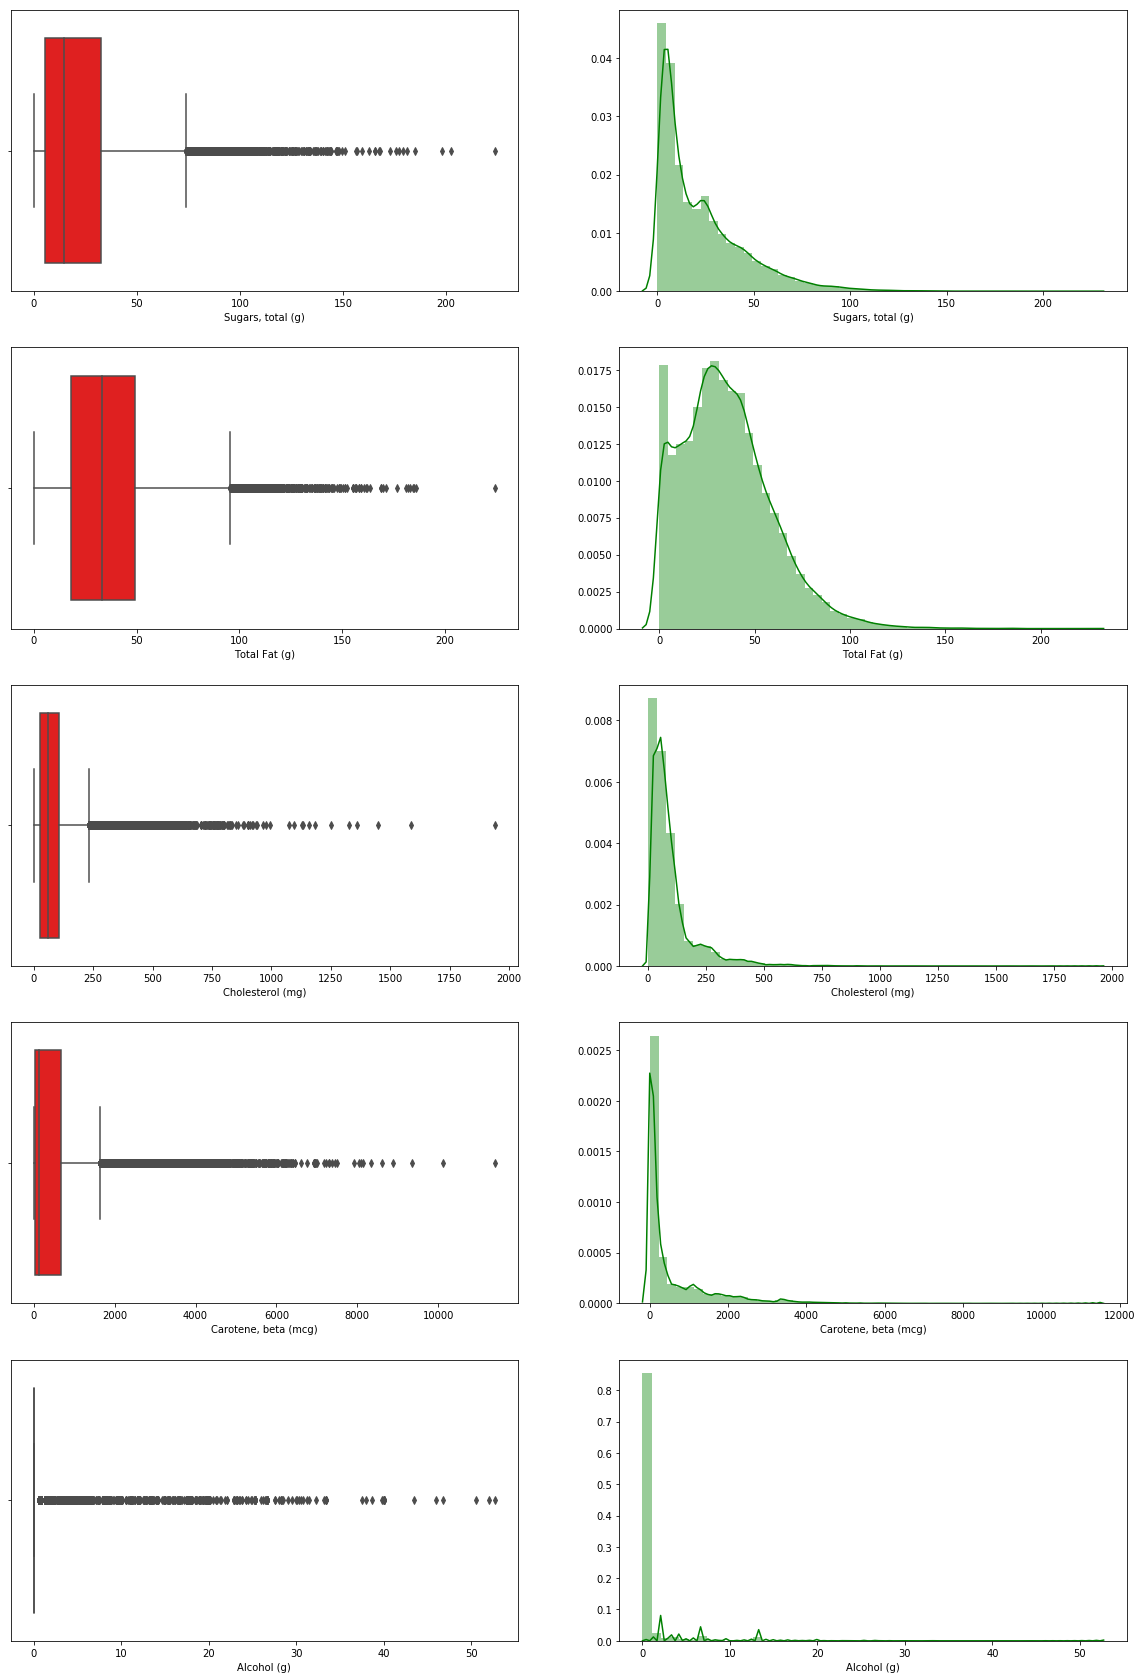

In [23]:
food_nutrient_vis_df = food_nutrient_df_final.drop(food_nutrient_df_final.columns[[0,1]], axis = 1)
food_nutrient_vis_df.head()

#Making subplots 
f, axes = plt.subplots(5,2, figsize=[20,30])
count=0

#Using a for loop to get distributions of various nutrients 
for num_data in food_nutrient_vis_df:
    sb.boxplot(food_nutrient_vis_df[num_data], color='r', ax= axes[count, 0])
    sb.distplot(food_nutrient_vis_df[num_data], color='g', ax=axes[count, 1])
    count += 1

All the nutrients dont have a normal distribution. Most tend to have lot of outliers. Additionally, Sugar total and Total fat have a greater spread of values as compared to other values as seen by the comparison in their Boxplots

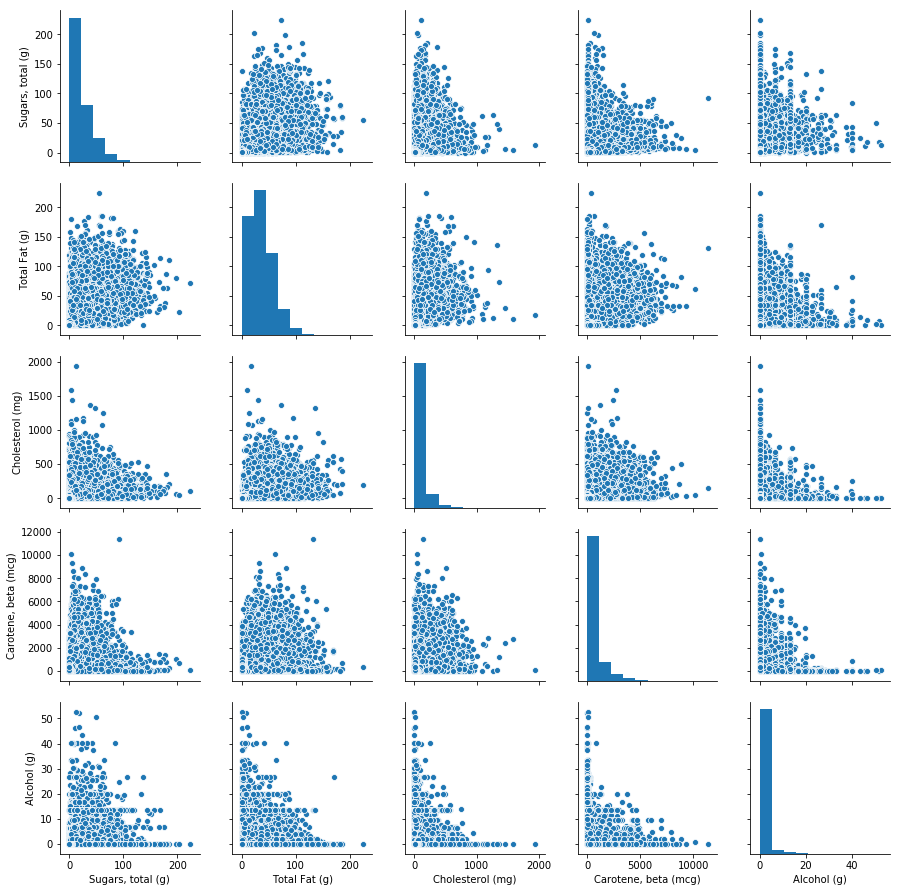

In [24]:
#Plot scatter plots to determine relationship between pair of nutrients
sb.pairplot(data =food_nutrient_vis_df)

In [28]:
#Display the correlation matrix
food_nutrient_vis_df.corr()

,"Sugars, total (g)",Total Fat (g),Cholesterol (mg),"Carotene, beta (mcg)",Alcohol (g)
"Sugars, total (g)",1.000000,0.281597,0.022130,-0.133837,0.051346
Total Fat (g),0.281597,1.000000,0.352454,0.113523,-0.099253
Cholesterol (mg),0.022130,0.352454,1.000000,0.151499,-0.038936
"Carotene, beta (mcg)",-0.133837,0.113523,0.151499,1.000000,-0.046649
Alcohol (g),0.051346,-0.099253,-0.038936,-0.046649,1.000000


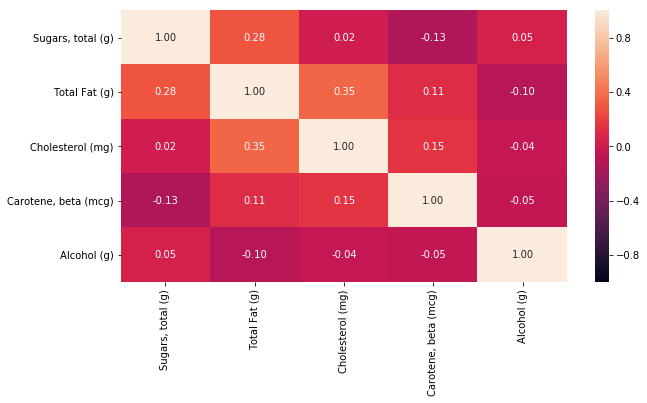

In [29]:
#Visualise correlation matrix as a heatmap
f, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.heatmap(food_nutrient_vis_df.corr(), vmin = -1, vmax = 1, annot = True, annot_kws={"size":10},fmt = ".2f", ax= axes)